Dieser Code importiert die notwendigen Bibliotheken und stellt sicher, dass alle erforderlichen Tools für die Bildklassifikation und Modellbewertung zur Verfügung stehen. Er umfasst Bibliotheken für numerische Berechnungen, Datenverarbeitung, Bildverarbeitung, Visualisierung, maschinelles Lernen und neuronale Netze.

### Importierte Bibliotheken

- `numpy`: Bibliothek für numerische Berechnungen in Python, besonders für Arbeiten mit Arrays.
- `pandas`: Bibliothek für Datenanalyse und -manipulation.
- `os`: Modul zur Interaktion mit dem Betriebssystem, besonders zur Dateiverwaltung.
- `cv2`: OpenCV-Bibliothek für Bildverarbeitung.
- `matplotlib.pyplot`: Bibliothek für Datenvisualisierung.
- `tensorflow` und `keras`: Bibliotheken für maschinelles Lernen und neuronale Netze.
- `PIL` (Pillow): Bibliothek für Bildverarbeitung.
- `sklearn.model_selection`: Enthält Funktionen zur Aufteilung von Daten in Trainings- und Testsätze.
- `tensorflow.keras.preprocessing.image`: Enthält Werkzeuge zur Bildvorverarbeitung und Datenaugmentation.
- `tensorflow.keras.optimizers`: Enthält verschiedene Optimierungsalgorithmen.
- `sklearn.metrics`: Enthält Funktionen zur Bewertung von Modellen.

In [7]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

Nun müssen die Pfade für die Datasets definiert werden. Außerdem werden die Bilder auf eine einheitliche Größe von 30x30 Pixeln und 3 Kanälen für RGB definiert:

In [8]:
#Assigning Path for Dataset
data_dir ='C:\\Users\\Steven\\Desktop\\archive (1)'
train_path ='C:\\Users\\Steven\\Desktop\\archive (1)/Train'
test_path ='C:\\Users\\Steven\\Desktop\\archive (1)/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

Um zu Prüfen, ob die Pfäde zu den Daten korrekt sind, wird einmal die Anzahl der Kategorien, also die Anzahl verschiedener Verkehrszeichen aus den Trainingsdaten ausgegeben:

In [9]:
#Finding total classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

Jetzt müssen die einzelnen Klassen einmal gelabelt werden:

In [10]:
#Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

Um uns einen Überblick über die Trainingsdaten zu verschaffen, wird ein Histogramm erstellt. Dies zeigt alle Klassen mit der entsprechenden Anzahl an verfügbaren Bildern aufsteigend sortiert.
Klassen mit weniger vorhandenen Bildern werden später wahrscheinlicher schlechter klassifiziert, da nicht genug Trainingsdaten vorhanden sind.

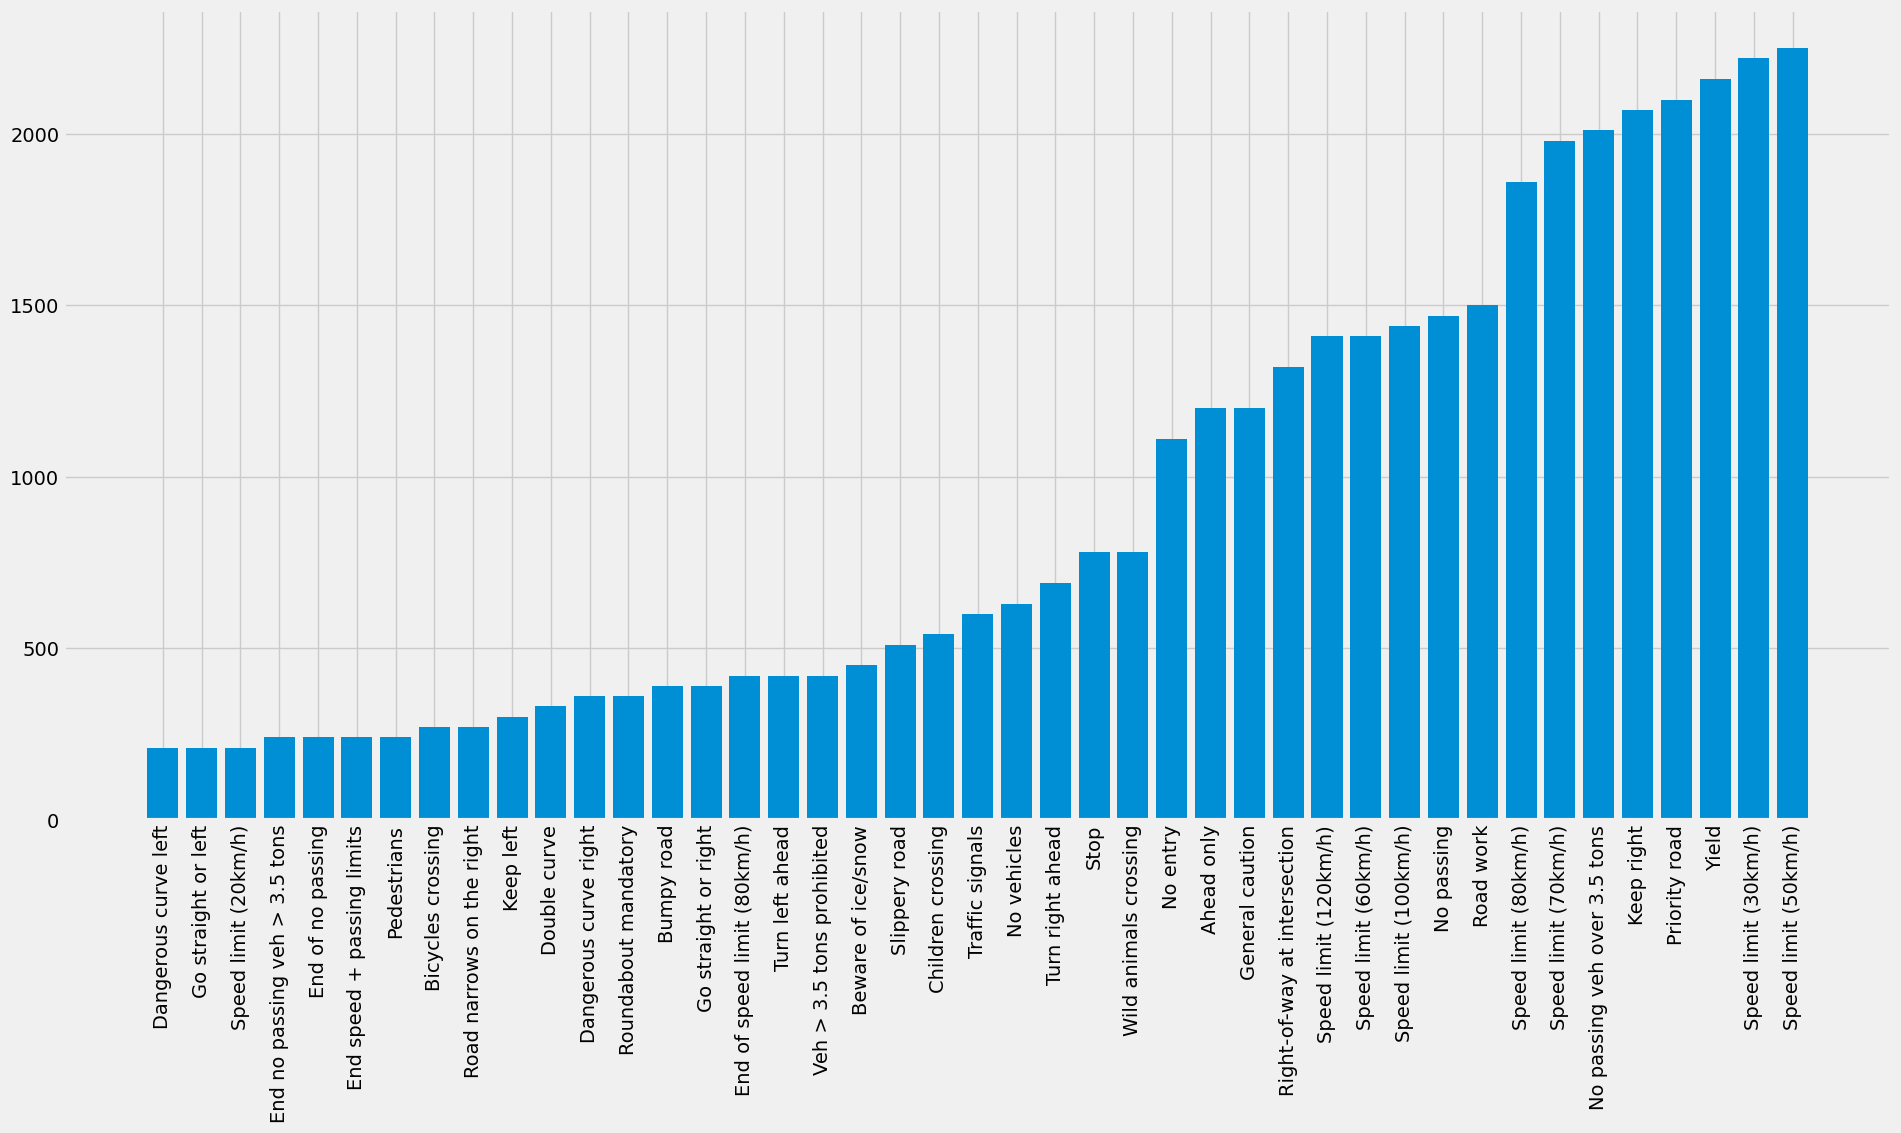

In [11]:
#Vizualizing the Dataset
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

Nun sollen 25 zufällig ausgewählte Bilder mit ihren Maßen geplottet werden:

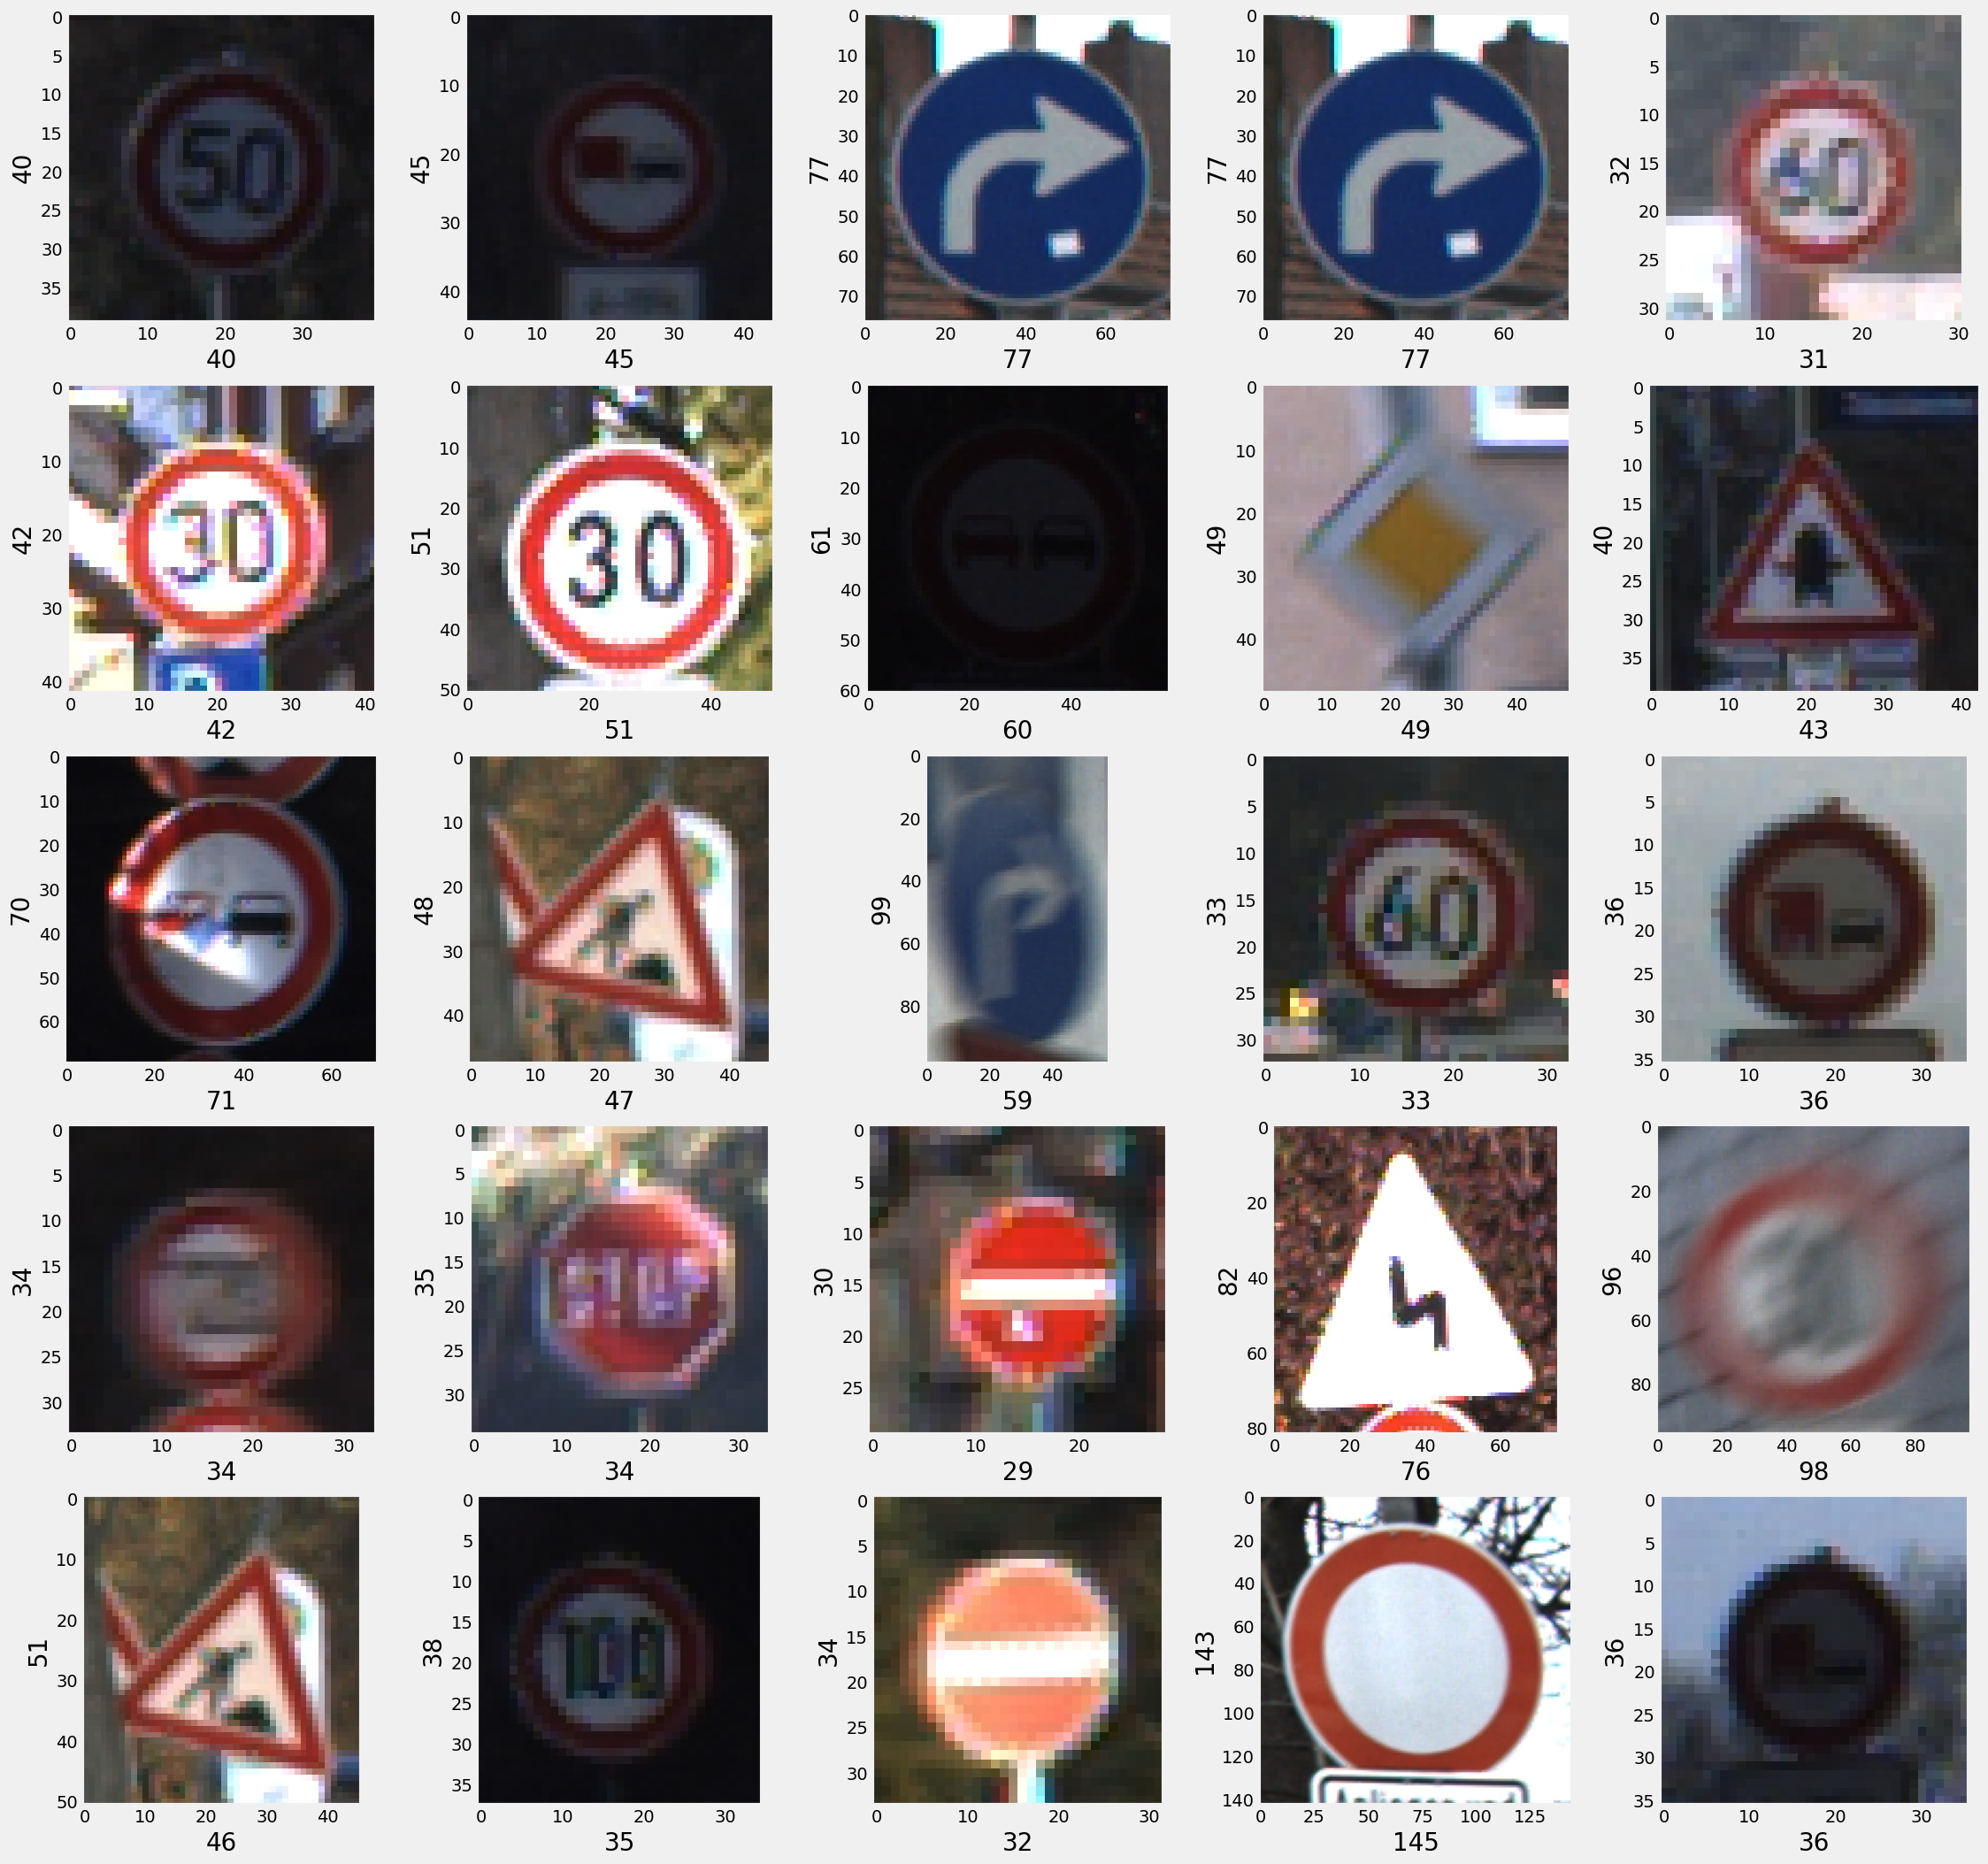

In [15]:
#Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(False)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

Zur Kontrolle, ob auch alle Trainingsdaten vollständig geladen werden, soll die Anzahl der Daten mit den entsprechenden Maßen ausgegeben werden:

In [12]:
#Collecting the Training Data
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


Ein Abgleich mit der Training.csv-Datei zeigt, dass alle 39209 Bilder erfasst wurden. Außerdem sind alle nun 30x30 Pixel groß und haben 3 Farbkanäle. Jedes Bild hat auch genau ein Label.

Da alle Bilder nun geladen wurden, müssen sie zum Training einmal gemischt werden:

In [13]:
#Shuffling the Training Data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

Die Trainingsdaten werden nun in 70% Trainingsdaten und 30% Validierungsdaten aufgeteilt:

In [14]:
#Splitting the Data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


Die Labels müssen nun noch einmal encoded werden, damit das CNN die Labels auch korrekt interpretieren kann:

In [15]:
#One hot encoding the labels
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


Hier geschieht nun der wichtigste Teil des Trainings: Das Modell. Der Code erstellt ein CNN-Modell für die Klassifikation von Bildern. Es enthält mehrere Convolutional Layers zur Merkmalserkennung, gefolgt von Fully Connected Layers zur Klassifikation. Batch Normalization und Dropout werden verwendet, um die Trainingseffizienz zu erhöhen und Overfitting zu verhindern.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Input

# Definieren der Zielbildgröße
IMG_HEIGHT, IMG_WIDTH, channels = 30, 30, 3  

# Modell erstellen mit Input(shape)
model = Sequential()
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, channels)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))


Jetzt muss noch festgelegt werden, wie genau trainiert werden soll. Dieser Codeabschnitt definiert den Optimizer (Adam) und die Loss-Funktion (kategoriale Kreuzentropie) für das Modell und kompiliert das Modell mit diesen Einstellungen. Die Lernrate wird schrittweise abnehmen, um das Modell während des Trainings zu stabilisieren und die Genauigkeit der Vorhersagen zu verbessern. Die Anzahl der Epochen ist auf 50 festgelegt, was bedeutet, dass das gesamte Trainingsset 50 Mal durchlaufen wird.

In [17]:
from tensorflow.keras.optimizers import Adam

lr = 0.001
epochs = 50

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Dieser Codeabschnitt definiert die Datenaugmentation, um die Variabilität im Trainingssatz zu erhöhen und somit das Modell robuster und weniger anfällig für Overfitting zu machen. Anschließend wird das Modell mit den augmentierten Daten trainiert und die Trainings- und Validierungsleistung in history gespeichert. Die Verwendung von ImageDataGenerator ermöglicht es dem Modell, verschiedene Transformationen der Trainingsbilder zu sehen, was zu einer besseren Generalisierungsfähigkeit führt.

In [18]:
#Augmenting the data and training the model
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/50
  9/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.0534 - loss: 5.0438

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.4915 - loss: 2.0714 - val_accuracy: 0.9620 - val_loss: 0.1267
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9299 - loss: 0.2267 - val_accuracy: 0.9850 - val_loss: 0.0508
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9613 - loss: 0.1246 - val_accuracy: 0.9901 - val_loss: 0.0345
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9750 - loss: 0.0848 - val_accuracy: 0.9808 - val_loss: 0.0565
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9725 - loss: 0.0910 - val_accuracy: 0.9917 - val_loss: 0.0273
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9768 - loss: 0.0750 - val_accuracy: 0.9965 - val_loss: 0.0115
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9823 - loss: 0.0585 - val_accuracy: 0.9853 - val_loss: 0.0473
Epoch 8/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9804 - loss: 0.0624 - val_accurac

Jetzt stellt sich die Frage, wie gut das Training lief. Dies kann für einen groben Überblick mit einem Diagramm, welches die Anteile von accuracy, loss, validierungs-accuracy und validierungs-loss darstellt, gemacht werden:

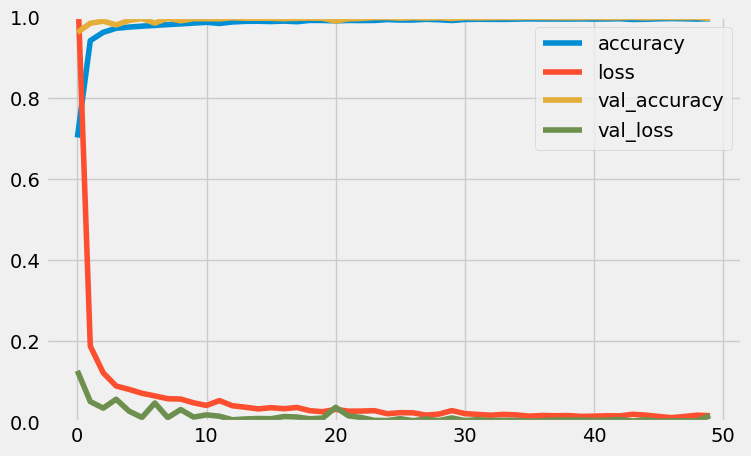

In [19]:
#Evaluating the Model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Aber wie gut ist das Modell konkret? Dazu interessiert und die Trefferquote unter den Testdaten:

In [20]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Data accuracy:  97.88598574821853


Der Test hat gezeigt, dass das CNN gut 98% aller Testbilder korrekt klassifziert hat. Das ist eine sehr solide Leistung.

Das Testergebnis lässt sich ebenfalls mittels einer Konfusionsmatrix darstellen. Darin kann man erkennen, welche Bilder wie oft korrekt oder falsch klassifiziert wurden.

In [21]:
#Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<Axes: >

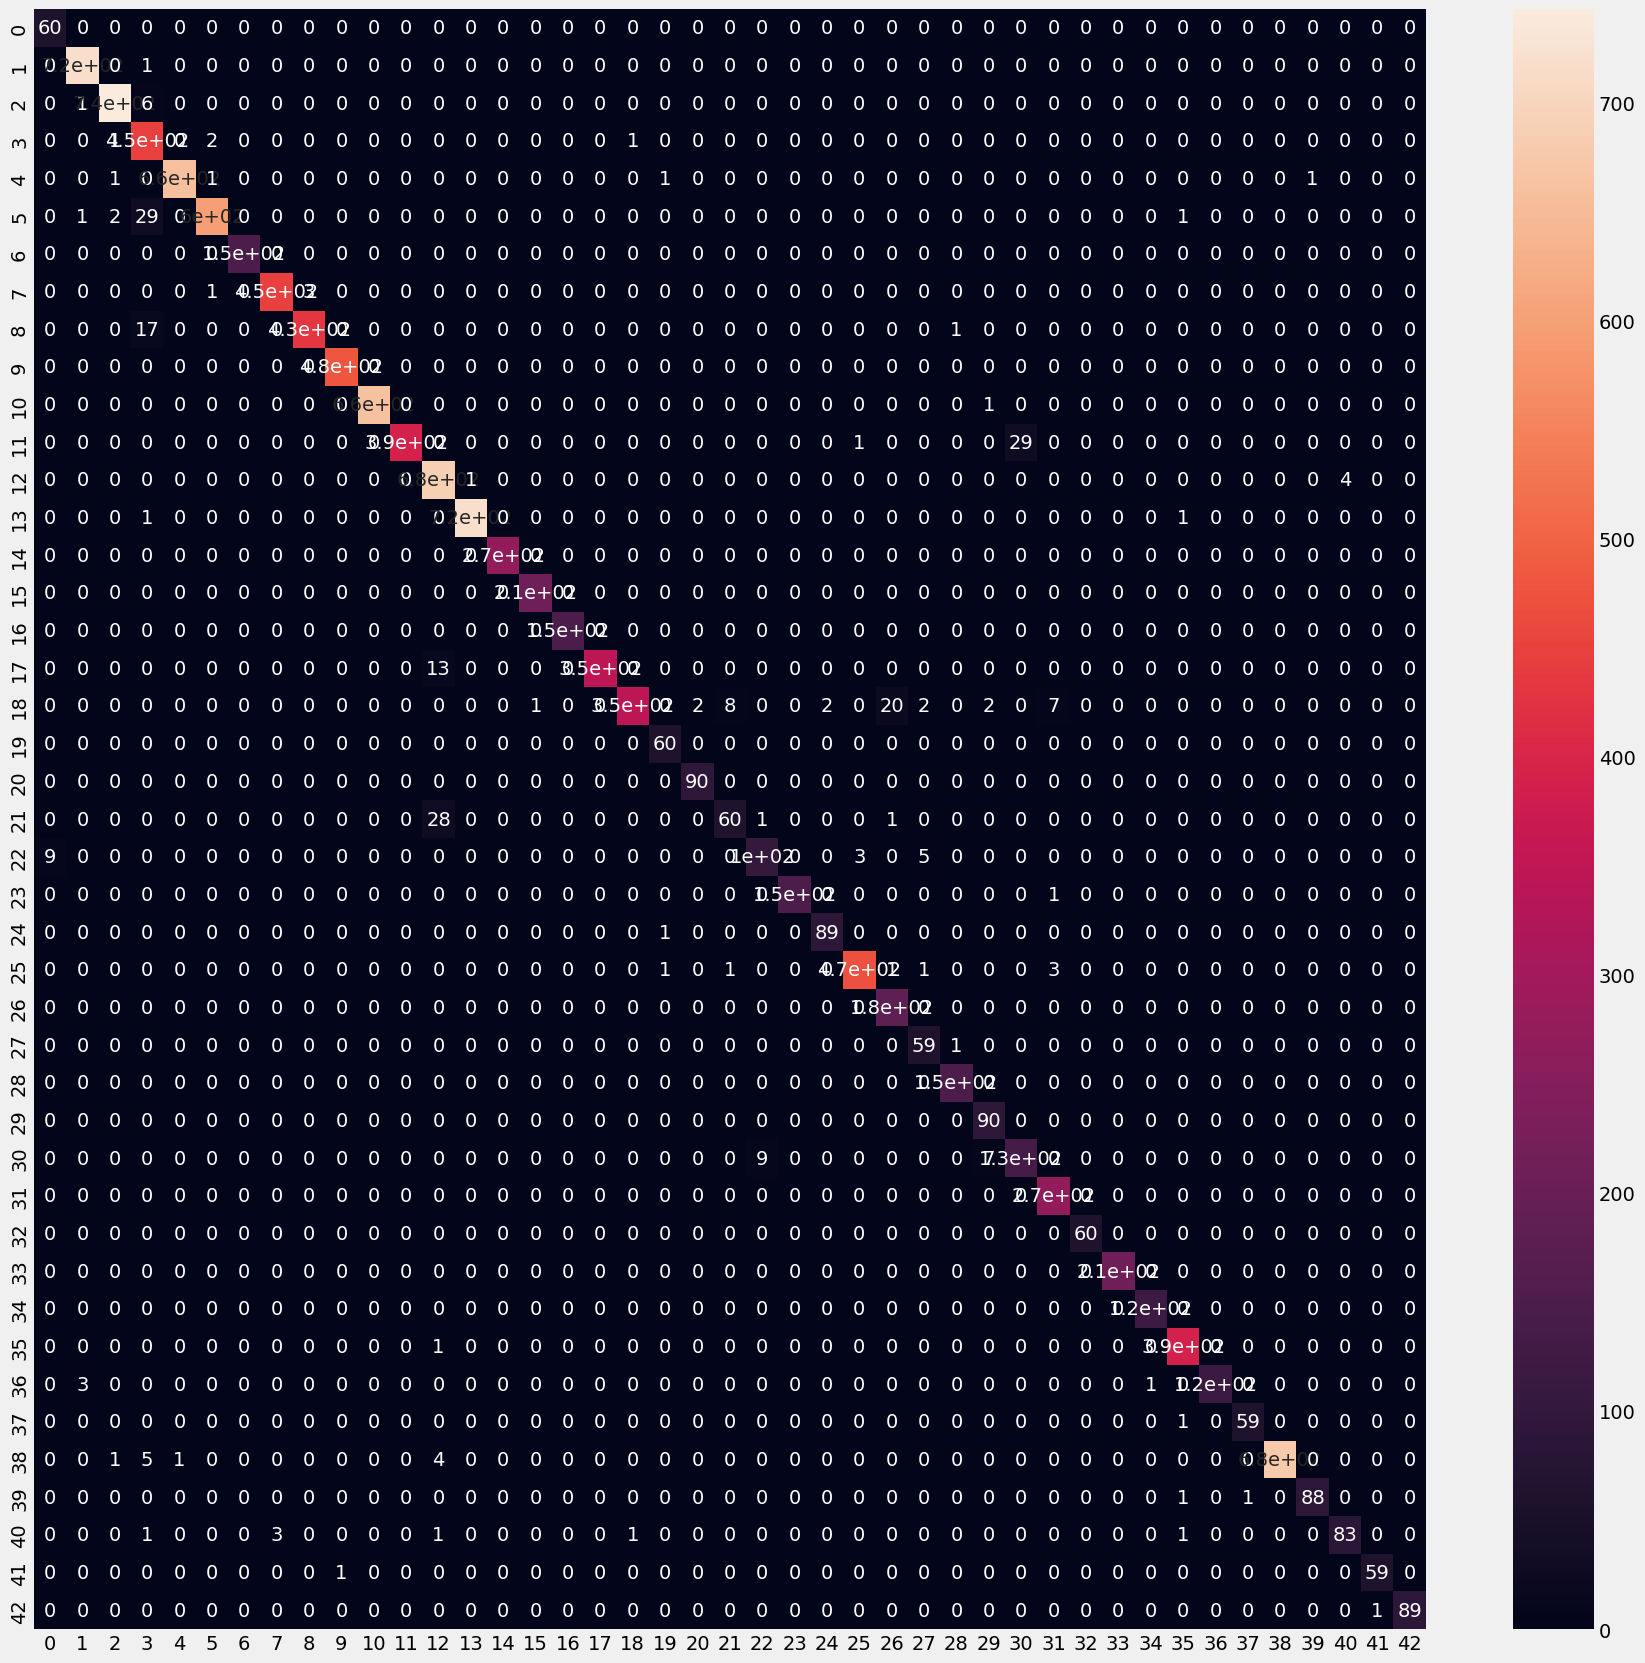

In [22]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

Für die Vollständigkeit wird noch einmal ein Klassifikationsreport erstellt. Dazu nutzen wir die vorgefertigte Funktion classification_report der sklearn.metrics Bibliothek.

In [23]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.99      1.00      1.00       720
           2       0.99      0.99      0.99       750
           3       0.88      0.99      0.93       450
           4       1.00      0.99      1.00       660
           5       0.99      0.95      0.97       630
           6       1.00      1.00      1.00       150
           7       0.99      0.99      0.99       450
           8       0.99      0.96      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       1.00      0.93      0.96       420
          12       0.94      0.99      0.96       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

Nun Plotten wir einmal 25 Bilder und schauen, ob das CNN diese jeweils richtig klassifiziert hat:

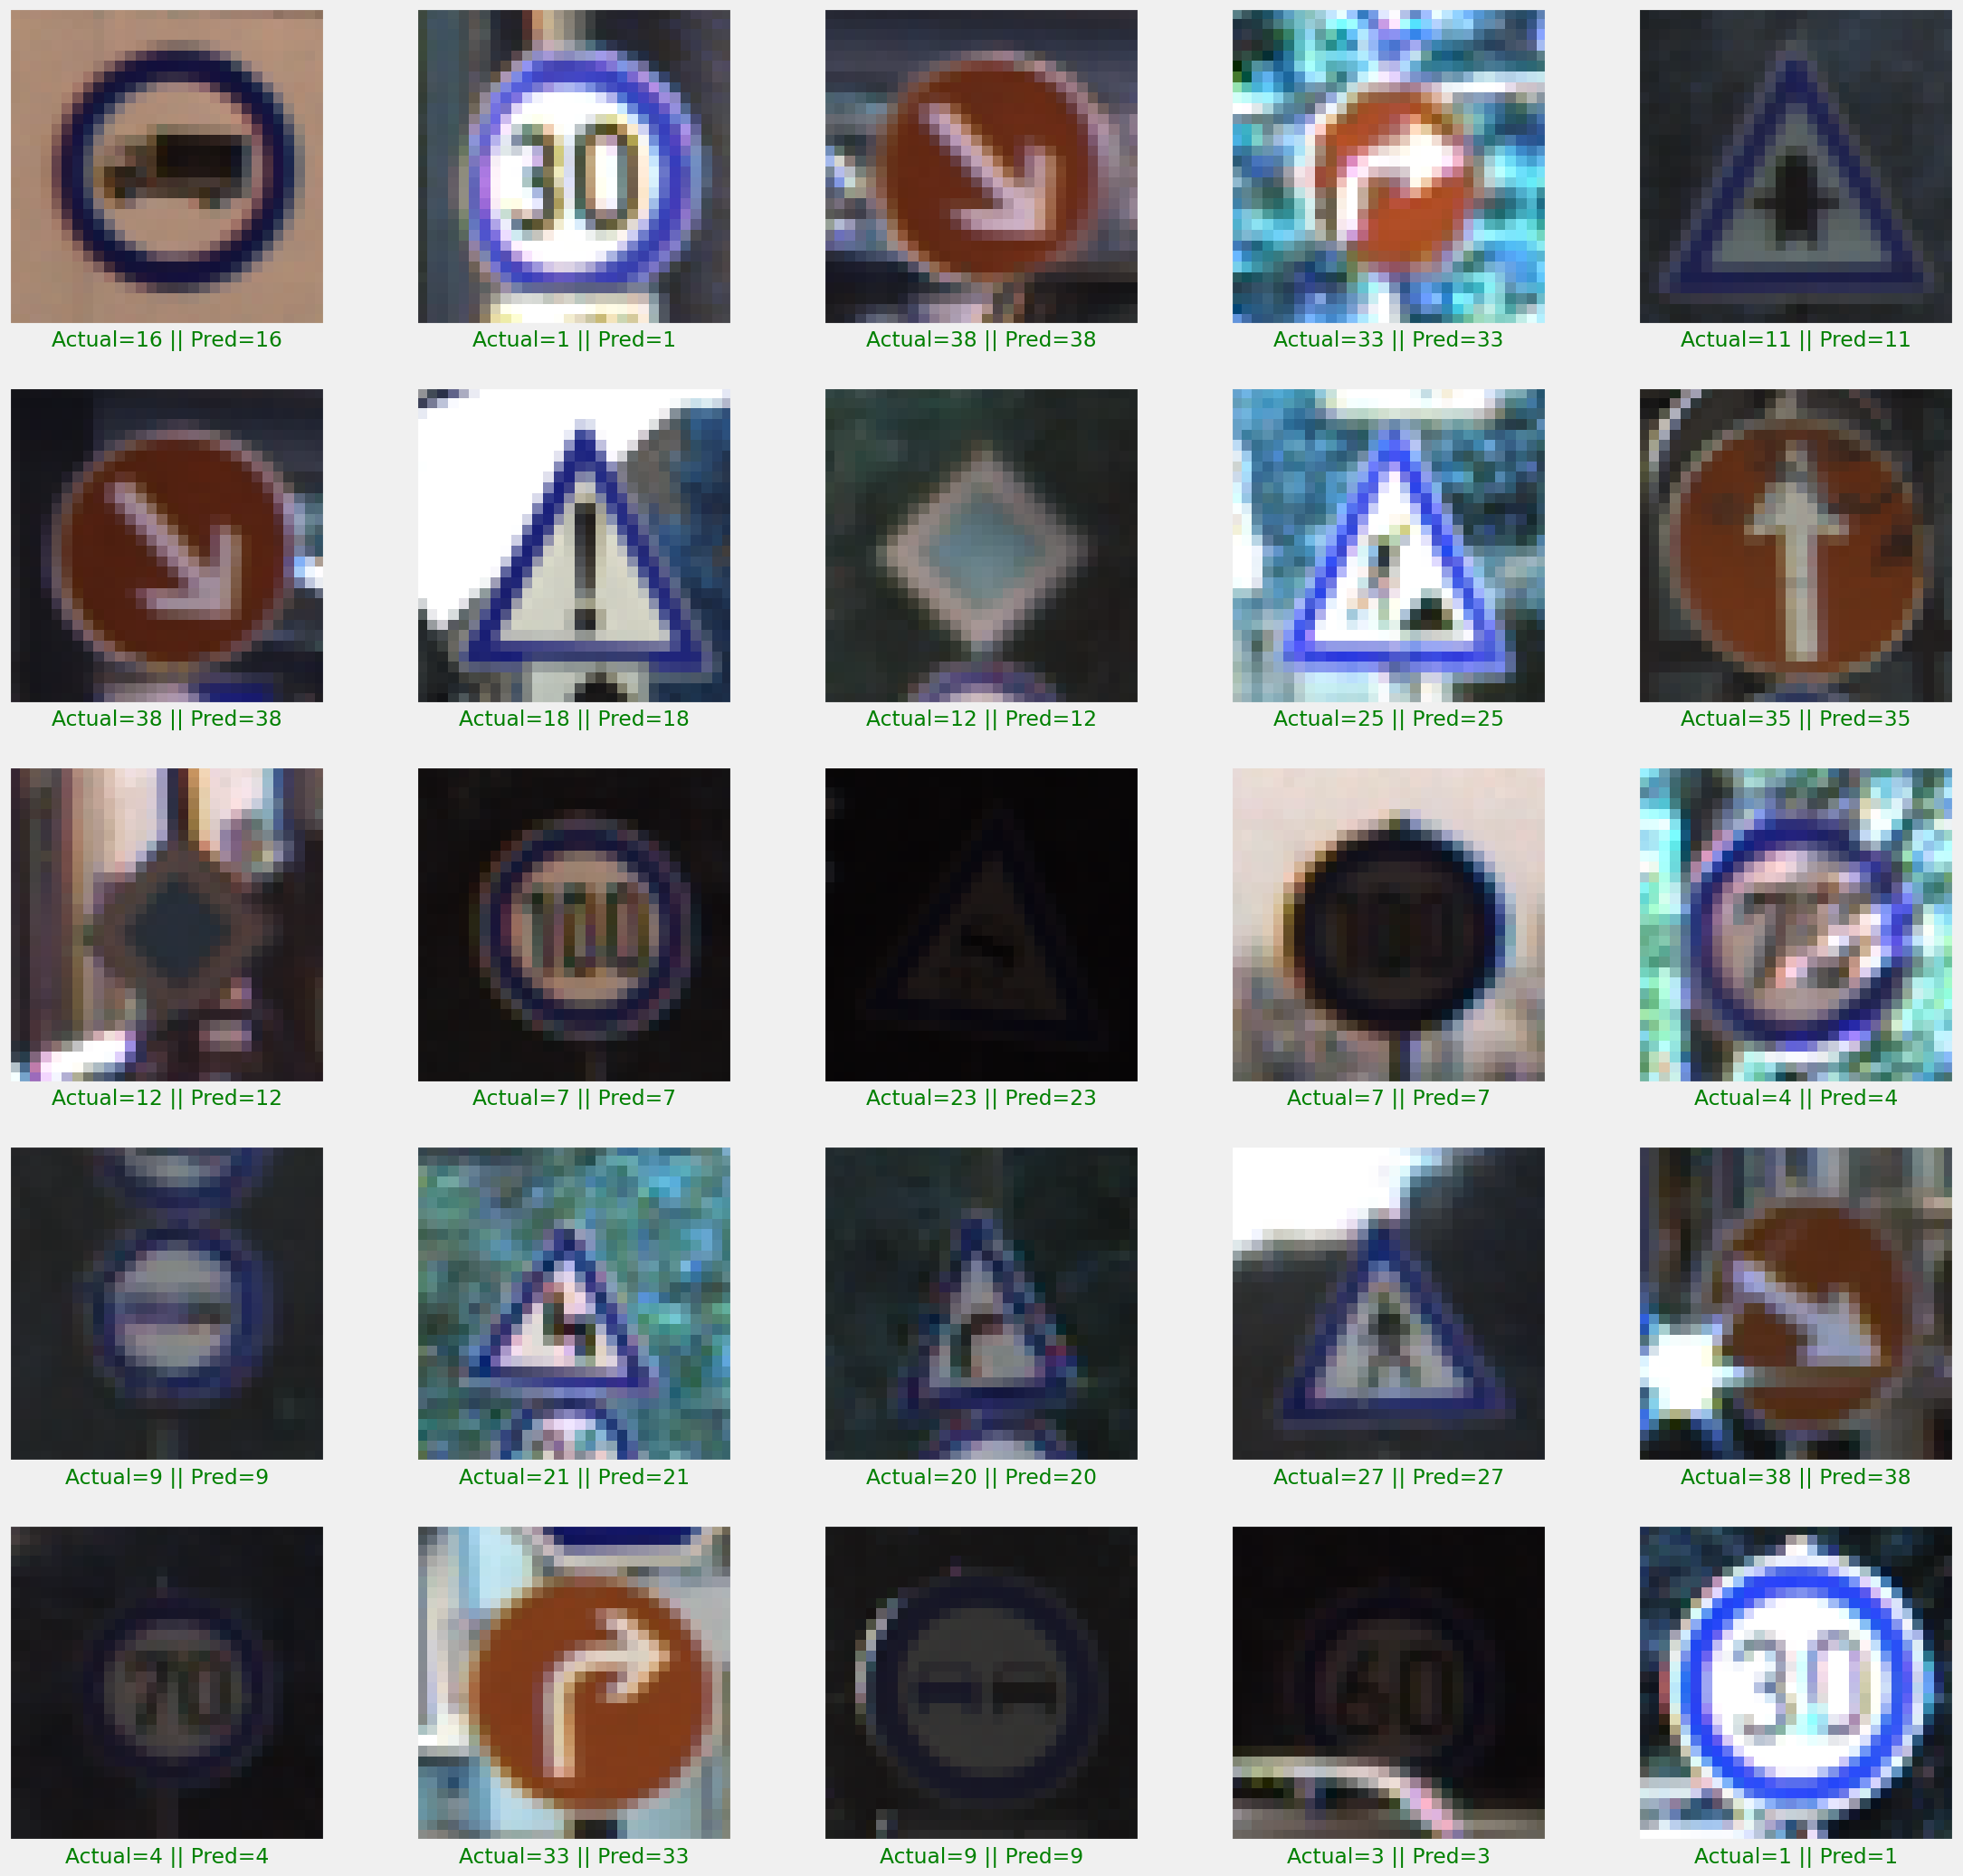

In [24]:
#Predictions on Test Data
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()